In [1]:
!pip install --user -U scikit-learn imbalanced-learn

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

### 2. Loading the Dataset
This line loads the CSV file named `spam.csv` into a pandas DataFrame `df`.

- **`encoding='utf-8'`**: Specifies the file's encoding.
- **`encoding_errors='ignore'`**: Ignores any encoding errors that might occur while reading the file.

In [ ]:
# Load dataset
df = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='ignore')

In [ ]:
df

### 3. Preparing the Data

In [ ]:
# Checking column names (assuming 'v1' is the label and 'v2' is the text)
df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df[['label', 'message']]  # Keep only necessary columns

In [ ]:
df

In [ ]:
df["label"].value_counts(normalize = True)

### 4. Splitting the Data into Training and Testing Sets

The `train_test_split(...)` function is used to split the dataset into training and testing sets.

- **`test_size=0.2`**: Specifies that 20% of the data will be used for testing, while the remaining 80% will be used for training.
- **`stratify=df['label']`**: Ensures that the split is stratified, meaning the proportion of spam vs. non-spam messages is maintained in both the training and testing sets.

In [ ]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

### 5. Vectorizing the Text Data

- **`CountVectorizer(stop_words='english')`**: Initializes a `CountVectorizer`, which converts the text into a matrix of token counts, ignoring common English stop words.
- **`fit_transform(X_train)`**: Learns the vocabulary from the training set and transforms the training text data into a sparse matrix of token counts.
- **`transform(X_test)`**: Transforms the test text data into the same matrix format, using the vocabulary learned from the training data.

In [ ]:
# Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english')
X_train_count = count_vectorizer.fit_transform(X_train)


X_test_count = count_vectorizer.transform(X_test)

In [ ]:
X_train_count.todense()

In [ ]:
y_train.value_counts()

In [ ]:
y_train.value_counts(normalize = True)

### 6. Applying SMOTE to Handle Class Imbalance

- **`SMOTE(random_state=42)`**: Creates an instance of SMOTE with a random state for reproducibility.
- **`fit_resample(X_train_count, y_train)`**: Applies SMOTE to the training data:
  - **`X_train_count`**: The vectorized text data of the training set.
  - **`y_train`**: The labels (spam/ham) of the training set.
  - **`X_train_smote, y_train_smote`**: Outputs the new balanced training set after adding synthetic examples to the minority class.

In [ ]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_count, y_train)

In [ ]:
y_train_smote.value_counts()

### 7. Training the SVM Model

- **`SVC(kernel='linear', random_state=42)`**: Initializes an SVM classifier with a specified kernel. Possible kernel values include:
  - **`'linear'`**: A linear kernel, which is suitable for linearly separable data.
  - **`'poly'`**: A polynomial kernel, which can model non-linear decision boundaries with polynomial functions.
  - **`'rbf'`**: A radial basis function (RBF) kernel, which is effective for capturing complex relationships in the data.
  - **`'sigmoid'`**: A sigmoid kernel, which mimics the behavior of a neural network and can be used for non-linear problems.

- **`fit(X_train_smote, y_train_smote)`**: Trains the SVM model using the SMOTE-balanced training data.
  - **`X_train_smote`**: The balanced vectorized text data of the training set.
  - **`y_train_smote`**: The balanced labels (spam/ham) of the training set.


In [ ]:
# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_count)

### 9. Evaluating the Model

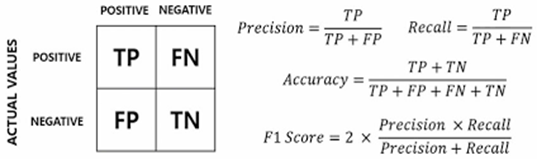


In [ ]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='ignore')


# Checking column names (assuming 'v1' is the label and 'v2' is the text)
df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df[['label', 'message']]  # Keep only necessary columns

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))